In [1]:
#===============================================
# Basic Imports
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import PolynomialFeatures

%run -i miniutil_singel_pipe_eval_helper.py

df_summery = pd.DataFrame()

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load detection_pipe


# Feature list

* PSD_raw
* PSD_den
* PSD_bssm
* PSD_denbssm
* ICA_demix
* MEL_raw
* MEL_den
* MEL_bssm
* MEL_denbssm

# Low noise ID00

In [2]:
## Meta
machines = ['pump']
SNRs = ['6dB']
IDs = ['00']
feat_discfile = '/dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl' 

## PSD_bssm

../..//dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9983760065201425
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.8830016137708445
pipe saved to pickle


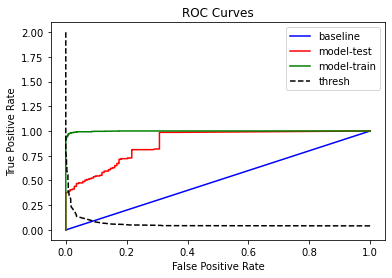

RFCn_pump006dBPSD_bssm


In [3]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_bssm'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_RandomForestClassifier, {'max_depth': 2})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'n' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

## PSD_raw

../..//dataset/extdia_v1/pump6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9973434715999189
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.9991686635043279
pipe saved to pickle


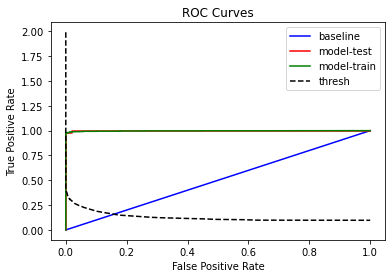

RFCn_pump006dBPSD_raw


In [4]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_RandomForestClassifier, {'max_depth': 2})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'n' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

# High noise ID00

In [5]:
## Meta
machines = ['pump']
SNRs = ['min6dB']
IDs = ['00']
feat_discfile = '/dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl' 

## PSD_raw

../..//dataset/extdia_v1/pumpmin6dB00_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9858566884497073
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.845713726832608
pipe saved to pickle


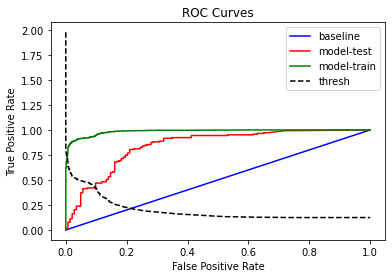

RFCn_pump00min6dBPSD_raw


In [6]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_RandomForestClassifier, {'max_depth': 2})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'n' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

# High noise ID02

In [7]:
## Meta
machines = ['pump']
SNRs = ['min6dB']
IDs = ['02']
feat_discfile = '/dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl' 

## PSD_raw

../..//dataset/extdia_v1/pumpmin6dB02_EDiaV1HPaug0_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9860435465869906
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6367177988799609
pipe saved to pickle


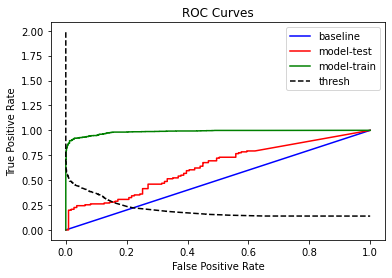

RFCn_pump02min6dBPSD_raw


In [8]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_RandomForestClassifier, {'max_depth': 2})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'n' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

# Summery

In [9]:
df_summery.loc['test  ROC-AUC']
df_summery.to_pickle('S01_summerys/S01_RFC_Pump')

#  Hyperparamters search

since the training set is overfitting and to some extend this is good but maybe some regularisation can improve generlization

In [10]:
#https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74